In [ ]:
# collection, defaultdict and lambda
import numpy as np
from collections import defaultdict

visited_pairs = defaultdict(lambda: np.ones(2))  # {"key": np.array([0, 0])}
print(visited_pairs[1][1])
visited_pairs[1][1] += 1
print(visited_pairs[1][1])

In [ ]:
# defaultdict means that if a key is not found in the dictionary ...
#     ... then instead of a KeyError being thrown, a new entry is created
d = defaultdict(int)  # specify the type
for k in "abraccadabra":
    d[k] += 1 # no need to check if key exists
d.items()

In [ ]:
# replace verbose - debug log
# https://docs.python.org/3/howto/logging.html
import logging
import sys
logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)  # level is specified
# if no destination is set, they will set a destination of the console (sys.stderr)
logger_1 = logging.getLogger(__name__)

logger_1.debug('A debug message!')
logger_1.propagate = False
# Child loggers propagate messages up to the handlers associated with their ancestor loggers.
logger_1.info('1/2 - We processed {} records'.format(len([1, 2])))
logger_1.propagate = True
logger_1.info('2/2 - We processed %d records', len([1, 2]))  # uses the old, %-style of string formatting.

# The INFO message doesn’t appear because the default level is WARNING

In [ ]:
# Advanced logging
import logging
logger_2 = logging.getLogger(__name__)
logger_2.setLevel(logging.INFO)  # lowest-severity log message a logger will handle

formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s', datefmt="%Y-%m-%d %H:%M:%S")  # specify the layout of log records in the final output
file_handler = logging.FileHandler("logfile.log")  # Handlers send the log records 
file_handler.setFormatter(formatter)

logger_2.addHandler(file_handler)
logger_2.info('2 - We processed %d records', len([1, 2]))

In [ ]:
# unpack tuple
sar = ((20, 6, True), 0, 1.0)
(state, done, reward) = sar  # unpack
print(state)
print(reward)
print(*sar)  #  *-operator to unpack the arguments out of a list or tuple
state, done, reward = (*sar,)  # unpack
print(state)
print(reward)

In [ ]:
# product of elements in a list
import gym
import gym.spaces
env = gym.make('Blackjack-v0')
nb_possible_states = np.prod([elem.n for elem in env.observation_space.spaces])

In [ ]:
# If-Else one-line
reward = 0.5 
print('You won :)\n') if reward > 0 else print('You lost :(\n')
state = [20]
probs = [0.8, 0.2] if state[0] > 18 else [0.2, 0.8]
action = np.random.choice(np.arange(2), p=probs)

In [ ]:
# zip
episode = [((12, 10, False), 1, 0), ((13, 10, False), 1, 0),
           ((20, 10, False), 0, 1.0)]
states, actions, rewards = zip(*episode)
print(actions)
gamma = 2
discounts = [gamma**i for i in range(len(rewards)+1)]
print(discounts)

In [ ]:
# enumerate
for i, state in enumerate(states):
    print(i)
    print(state)
    print(states[i])  # same as state
    print(actions[i])  # way to access the corresponding action

my_list = ['apple', 'banana', 'grapes', 'pear']
# argument = where to start the counter
counter_list = list(enumerate(my_list, 1))
print(counter_list)
# Output: [(1, 'apple'), (2, 'banana'), (3, 'grapes'), (4, 'pear')]

In [ ]:
# clip of decay
epsilon = 1
eps_decay = 0.999
eps_min = 0.05
for i in range(10):
    epsilon = max(epsilon*eps_decay, eps_min)

In [ ]:
# argmax and dict()
Q = defaultdict(lambda: np.zeros(2))
Q[1][0] = 0
Q[1][1] = 1
Q[2][0] = 2
policy = dict((k,np.argmax(v)) for k, v in Q.items())
print(policy)

In [ ]:
# monitor progress
i_episode = 100
num_episodes = 1000
if i_episode % 10 == 0:
    print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
    sys.stdout.flush()

In [16]:
max_reward = 0
for i in range(10000):
    print("\r {}".format(i), sep=' ', end='', flush=True)
    if(i % 1000 == 0):
        print("\npause - max_reward=", max_reward)
    max_reward = max(max_reward, i)

 0
pause 0
 1000
pause 999
 2000
pause 1999
 3000
pause 2999
 4000
pause 3999
 5000
pause 4999
 6000
pause 5999
 7000
pause 6999
 8000
pause 7999
 9000
pause 8999
 9999

In [9]:
import numpy as np
scores = [1, 1, 1, 1, 1, 1]
np.arange(len(scores))

array([0, 1, 2, 3, 4, 5])

In [ ]:
# multiply lists
rewards = np.array([1, 2, 3, 4])
discounts = np.array([1, 1, 1, 1, 1])
i = 1
print(rewards[i:])
print(discounts[:-(1+i)])
print(sum(rewards[i:]*discounts[:-(1+i)]))

In [ ]:
print("simon /r 1".rstrip())
'test string\n'.rstrip()

In [ ]:
# np.zeros requires a tuple
V_opt = np.zeros((4,12))
print(V_opt)

In [ ]:
reshape(4,12)

In [ ]:
# linspace()
num_episodes = 100
avg_scores = [1, 2, 3, 4, 5]
print(np.linspace(0,num_episodes,len(avg_scores)))

# arange
print(np.arange(3, 8, 2))

In [ ]:
import check_test

In [ ]:
# np.arange()
random.choice(np.arange(env.action_space.n))

In [ ]:
# deque
from collections import deque
# idea: `avg_rewards[0]` is the average return collected by the agent over the first 100 episodes.
import numpy as np
num_episodes = 3
avg_scores = deque(maxlen=num_episodes)   # average scores over every plot_every episodes
tmp_scores = [10, 12]
avg_scores.append(np.mean(tmp_scores))
tmp_scores = [8, 10]
avg_scores.append(np.mean(tmp_scores))
tmp_scores = [6, 8]
avg_scores.append(np.mean(tmp_scores))
tmp_scores = [4, 6]
avg_scores.append(np.mean(tmp_scores))
print(avg_scores)
print(np.asarray(avg_scores))  # note asarray (not array)

In [ ]:
# dot product
a = np.array([1, 2])
b = np.array([10, 20])
np.dot(a, b)

In [ ]:
# initialize best average reward
best_avg_reward = -math.inf

In [ ]:
import numpy as np
nA = 3
print(np.arange(nA))
prob = np.ones(nA) / nA
np.random.choice(np.arange(nA), p=prob)

In [ ]:
nA = 5
np.random.choice(np.arange(nA))

In [ ]:
# https://gym.openai.com/docs/#spaces
import gym
import gym.spaces
env = gym.make('CartPole-v0')
print(env.action_space)
#> Discrete(2)
print(env.observation_space)
#> Box(4,)

In [ ]:
# np.digitize
# Return the indices of the bins to which each value in input array belongs.
x = np.array([0.2, 6.4, 3.0, 1.6])
bins = np.array([0.0, 1.0, 2.5, 4.0, 10.0])
inds = np.digitize(x, bins)
inds

In [ ]:
# print(*objects, sep=' ', end='\n', file=sys.stdout, flush=False)
a = 5
print("a =", a, a, sep='00000', end='\n\n\n')

In [ ]:
# repr - to print a list
samples = np.array([[-1.0 , -5.0], [-0.81, -4.1], [-0.8 , -4.0],])
print(samples)
print("\nSamples:", repr(samples), sep="\n")

In [ ]:
# transpose, honrizontal stack and [:, 1:]
low = [-1.0, -5.0]
high = [1.0, 5.0]
grid = [np.array([1, 2, 3, 4]), np.array([11, 12, 13, 14])]
res = np.hstack((np.array([low]).T, grid, np.array([high]).T))
print(res)
res[:, 1:] * 2

In [ ]:
# 3 actions and 4*4 state space
state_grid = [
    np.array([-1.02, -0.84, -0.66, -0.48]),
    np.array([-5.600e-02, -4.200e-02, -2.800e-02, -1.400e-02])
]
action_size = 3
state_size = tuple(len(splits) + 1 for splits in state_grid)  # (4+1, 4+1)
print("state_size = {}".format(state_size))

In [ ]:
# add tuples - with "," to specify that it is a tuple
# res[block=y][row=x][column=action] - imagine it in 3d - pack them + apply rotation
shape = (5, 5) + (3,)  # (5, 5, 3)
res = np.zeros(shape=(shape))
# print(np.zeros(shape=(2,3,4)))
res[4][3][0] = 1  # target a specific point
state = (2, 2)  # access with a tuple (apply to all actions) - not a list
res[state] = 2
state = [0, 1]  # access with a list is different does not work (it only considers the first element)
res[state] = 4
print(res)

In [ ]:
max_avg_score = -np.inf

In [ ]:
# pandas rolling window
import pandas as pd
import numpy as np
scores = [1, 2, 2, 3, 3, 2, 4, 5, 5, 8, 6, 10]
avg_score = np.mean(scores[-3:]) # average on the last 3 scores
print(avg_score)
rolling_window = 2
rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
print(rolling_mean)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set plotting options
%matplotlib inline
plt.style.use('ggplot')
np.set_printoptions(precision=3, linewidth=120)

In [ ]:
# 
elements = [1, 2, 3, 4]
key = 'a'
res0 = map(lambda e: (e, key), elements)

# or zip list with a single element
import itertools
res1 = zip(elements, itertools.repeat(key))
print(set(res0))
print(list(res1))

In [ ]:
# list comprehention with several objects
tiling_specs = [((10, 10), (-0.066, -0.33)),  # with tuple
                [(10, 10), (0.0, 0.0)]]  # with list
for bins, offsets in tiling_specs:
    print("bins={}, offsets={}".format(bins, offsets))

In [ ]:
# make a unzip for list comprehension
bins=(10, 10)
offsets=(5.0, 2.0)
low = (-1, 1)
high = (0, 2)
res = list(zip(*[low, high, bins, offsets]))
print(res)
# list comprehension
[(low + high, offset + binn) for low, high, binn, offset in res]

In [ ]:
sample = (-1.2, -5.1)
grid = [
    np.array([-0.866, -0.666, -0.466, -0.266, -0.066,  0.134,  0.334,  0.534,  0.734]),
    np.array([-4.33, -3.33, -2.33, -1.33, -0.33,  0.67,  1.67,  2.67,  3.67])
]
list(zip(sample, grid))

In [ ]:
# flatten tuple
my_list = [(1, 0), (2, 0), (3, 4)]
res0 = list((np.array(my_list)).flatten())  # numpy flatten
print(res0)
res1 = np.concatenate(my_list)  # numpy concatenate
print(res1)

In [ ]:
# numpy - instead of loop, work with vectors
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(start=-10, stop=10, num=101)
plt.plot(x, np.absolute(x))
plt.show()

In [16]:
# np.argwhere(), flatten() and np.eye() for one-hot vector conversion
# OPTION 2 for improvement: construct a stochastic policy that puts equal probability on maximizing actions
nA = 3  # go_up / stay / go_down
nS = 2  # up / down
policy = np.zeros([nS, nA]) / nA
Q = [[0.2, 0.8, 0.2], [0.8, 0.2, 0.8]]
for s in range(nS):
    q = Q[s]  # Q(A = a1, a2; S = s0)
    best_a = np.argwhere(q==np.max(q)).flatten() # [[0] [2]] -> [0, 2]
    policy[s] = np.sum([np.eye(nA)[i] for i in best_a], axis=0)/len(best_a)
    print(best_a)
    print([np.eye(nA)[i] for i in best_a])
print(policy)

[1. 1. 1.]
[1]
[array([0., 1., 0.])]
[0 2]
[array([1., 0., 0.]), array([0., 0., 1.])]
[[0.  1.  0. ]
 [0.5 0.  0.5]]


In [18]:
# np.sum() with axis=0
Q = [[0.2, 0.8, 0.2], [0.8, 0.2, 0.8]]
print(Q)
print(np.sum(Q, axis=0))
print(np.sum(Q, axis=1))

[[0.2, 0.8, 0.2], [0.8, 0.2, 0.8]]
[1. 1. 1.]
[1.2 1.8]


In [21]:
# np.array_equal() vs all()
policy = np.array([[0.2, 0.8, 0.2], [0.8, 0.2, 0.8]])
new_policy = np.array([[0.2, 0.8, 0.2], [0.8, 0.2, 0.8]])
print((new_policy == policy).all())  # all() requires np arrays
policy = [[0.2, 0.8, 0.2], [0.8, 0.2, 0.8]]
new_policy = [[0.2, 0.8, 0.2], [0.8, 0.2, 0.8]]
print(np.array_equal(new_policy, policy))

True
True


In [63]:
# list are mutable - use copy to save their previous state
import copy
nS = 2
V = np.zeros(nS)
# try to save the previous state
old_V = V
old_V_copy = copy.copy(V)
# update is like passing by reference V to the function f(x): x[0]=1, return x
V[0] = 1
print(id(V))
print(id(old_V))
print(id(old_V_copy))
print(old_V)
print(old_V_copy)

2079009497936
2079009497936
2079009523152
[1. 0.]
[0. 0.]


In [24]:
# Python represents all its data as objects. Hence with references - use id()

#  - dict and list are mutable
#   - state can change while keeping reference constant
#   - great to use when you need to change the size of the object, example list, dict etc (like c++ Vector)
#   - poping an item from list object does change the state object, but object id will not be changed

#  - integers, floats, strings and tuple are objects that (their state) can not be changed
#   - It will raise a TypeError if you try to change it.
#   - If we assign new content, a new object is CREATED instead of the contents being modified.
#    - x = 10 or x+=10 uses an instanciation, no matter if x already exists
#   - Immutable objects are fundamentally expensive to “change”, because doing so involves creating a copy.
#   - the “value” of an immutable object can’t change, but it’s constituent objects can.
#    - my_tuple = ([0, 1])

#  - Custom classes are generally mutable (my_car.speed += 1)
#   - To simulate immutability in a class, one should override attribute setting and deletion to raise exceptions.
s = "abc"
print(id(s))  # 4702124
print(s[0])  # 'a'
s[0] = "o"
# TypeError: 'str' object does not support item assignment

2078902799584
a


TypeError: 'str' object does not support item assignment

In [58]:
# 'is' - The is operator compares the identity of two objects.
x = "simon"
y = "simon"
print(x is y)
print(x is "simon")
print(id(x) == id(y))

True
True
True


In [59]:
# 'is' - The is operator compares the identity of two objects.
x = {}
y = {}
print(x is y)
print(id(x) == id(y))

False
False


In [62]:
# reference can changes / stays when doing update or new instantiation
s = "xyz"
print(id(s))  # 800100
s += "uvw"  # state changes -> new instanciation
print(id(s))  # 4800500
l = [10]
print(id(i))  # 6348005
l[0] += 1  # state changes -> reference stays
print(id(i))  # 6348005
l = [20]  # new state -> reference stays!!
print(id(i))  # 1818848592

2079009661088
2079009663664
1818849264
1818849264
1818849264


2079009734728
2079009734728
2079009218376
2079009847816


In [38]:
# list() and dict() are mutable
# if a mutable object is called by reference in a function, it can change the original variable itself.
# call by reference, so the changes are made to the original list itself
def f(l):
    l += [2, 2]
x_mutable = [0, 1]
print(id(x_mutable))
f(x_mutable)  
print(id(x_mutable))
print(x_mutable)  # [0, 1, 2, 2]

2079005817800
2079005817800
2079005817800
2079005817800
[0, 1, 2, 2]


In [51]:
# "x = y" make them pointing to the same place in memory
x_mutable = [0, 1]
y_mutable = x_mutable  #  y will change if x is nodified
print(id(y_mutable))
print(id(x_mutable))
x_mutable += [2]
print(id(y_mutable))
print(id(x_mutable))
print(x_mutable)  # [0, 1, 2]
print(y_mutable)  # [0, 1, 2]

2079009215816
2079009215816
2079009215816
2079009215816
[0, 1, 2]
[0, 1, 2]


In [54]:
# int are not mutable
# Immutable objects can be called by reference because its value cannot be changed anyways.
# This is called pass by value
# When the value is called by the function, only the value of the variable is passed, not the object itself.
def f(i):
    i += 2
x = 0
print(id(x))
f(x)
print(id(x))  # unchanged
print(id(y))
print(x)  # 0
print(y)  # 0
y += 1
print(id(x))
print(id(y))  # changed
print(x)  # 0
print(y)  # 1

1818848240
1818848240
1818848240
0
0
1818848240
1818848272
0
1


In [53]:
# unmutable
x = 0
y = x #  y will change if x is nodified
print(id(x))
print(id(y))
x += 2
print(id(x))  # changed
print(id(y))  # did not change
print(x)  # 2
print(y)  # 0

1818848240
1818848240
1818848304
1818848240
2
0


In [2]:
from pprint import pprint
keys_features_list = ['position_on_segment', 'distanceToEndSegment', 'velocity', 'speed_limit', 'steering_angle', 'distance_to_crossing_from_right', 'distance_to_crossing_from_left', 'tti', 'merging_from_right', 'merging_from_left', 'opposing', 'priority_to_left', 'priority_to_right', 'horizon', 'latGap']
pprint(keys_features_list, indent=5)

[    'position_on_segment',
     'distanceToEndSegment',
     'velocity',
     'speed_limit',
     'steering_angle',
     'distance_to_crossing_from_right',
     'distance_to_crossing_from_left',
     'tti',
     'merging_from_right',
     'merging_from_left',
     'opposing',
     'priority_to_left',
     'priority_to_right',
     'horizon',
     'latGap']


In [24]:
from collections import Counter
import pprint
rewards = [0, 0, 0, 1, -1, 1, 0]
print(dict(Counter(rewards)))

{0: 4, 1: 2, -1: 1}


In [49]:
state = [0, 0]
next_state = [0, 0]
changes_in_state = (changes_in_state + 5) if(state == next_state) else (changes_in_state)
print(changes_in_state)

27
[ 1. 10.]


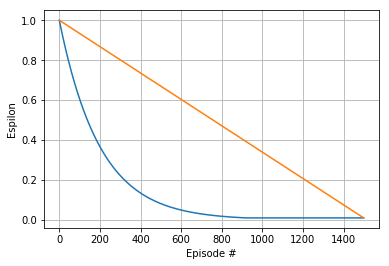

In [54]:
# np.linspace() - not np.arange()
import matplotlib.pyplot as plt
%matplotlib inline
eps_decay = 0.995
nb_episodes = 1500
eps_end = 0.01
eps_start = 1.0
eps = [max(eps_start * eps_decay ** i, eps_end) for i in range(nb_episodes)]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(eps)), eps)
plt.plot(np.arange(len(eps)), np.linspace(eps_start, eps_end, len(eps)))
plt.ylabel('Espilon')
plt.xlabel('Episode #')
plt.grid()
plt.show()